In [59]:
%reload_ext autoreload
%autoreload 2

import socket
import os
if socket.gethostname().startswith('ax'):
    path_prefix = '/mnt/smb/locker/miller-locker/users/Tahereh'
    path_codes = '/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    sys.path.append('/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Illusions')
elif socket.gethostname().startswith('demo'):
    path_prefix = '/home/tahereh/engram/users/Tahereh'
    path_codes = '/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    
print(os.getcwd())

## Settings of results 
fontsize_text = 25
color_text = 'mediumseagreen'
fontsize_text = 12


resultsdir = os.path.join(path_prefix, 'Research/Results/Generative_Inference')

# get the labels for imagenet
from Stimuli.load_stimuli import labels_imagenet


/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference


In [60]:
import torch

# for face net: 'advrobust_L2_eps_0.50' checkpoint 100
class Args:
    def __init__(self) -> None:
        self.model_arch = 'resnet50'
        
        self.dataset_model = 'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
        self.model_training ='advrobust_L2_eps_3.00' ##'advrobust_L2_eps_0.50' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_3.00' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_0.50'  'advrobust_L2_eps_3.00' #
        
        # self.dataset_model =  'vggface2' #'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_0.50' ##'advrob
        
        # self.dataset_model =  'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_3.00' ##'advrob
        
        self.epoch_chkpnt = 'full' #176 #100 #106 #100#'full' # 160 for vggface IncConfMSE #'full' 
        self.eval_dataset_identifier = 'vggface2_test'
        self.batch_size = 32


args = Args()

if args.dataset_model == 'vggface2':
    assert args.model_training == 'advrobust_L2_eps_0.50'
    args. norm_mean = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.norm_std = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.n_classes = 500
elif 'imagenet' in  args.dataset_model or 'places365' in args.dataset_model:
    args.norm_mean = torch.tensor([0.485, 0.456, 0.406]).cuda()
    args.norm_std = torch.tensor([0.229, 0.224, 0.225]).cuda()
    args.n_classes = 1000
else:
    raise ValueError(f"Dataset model {args.dataset_model} not supported yet")
          

#'vggface2'  'advrobust_L2_eps_0.50' 'full' 'vggface2_test' 32
# Load the model -----------------------------
model_args = {'model_arch': args.model_arch, 
              'model_training': args.model_training,
              'dataset': args.dataset_model,
              'epoch_chkpnt': args.epoch_chkpnt,
              'norm_mean': args.norm_mean,
              'norm_std': args.norm_std,
              'n_classes': args.n_classes,
            #   'inference': args.inference
              }

from Models import load_models
model, _ = load_models.load_models(model_args)
model = torch.nn.DataParallel(model).cuda()
_=model.eval()


args is a dictionary
get_dict_hash: dataset: imagenet, model_arch: resnet50
=> loading checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/madry_robust/imagenet/L2/imagenet_l2_3_0.pt'
=> loaded checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/madry_robust/imagenet/L2/imagenet_l2_3_0.pt' (epoch 105)
loading model from:  /home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/madry_robust/imagenet/L2/imagenet_l2_3_0.pt


In [138]:
## test the generative inference function
from Stimuli.load_stimuli import ImageLoader
from Inference.Generative_infernece import Inference

model_config = {'model': model, 'dataset_model': args.dataset_model, **model_args}
## pretty print the model_config
inference_config = {'loss_infer': 'ReverseDiffusion',#'IncreaseConfidence',# #'IncreaseConfidence', #'ReverseDiffusion', 
                    'loss_function': 'CE',#'MSE',# #'CE', #'MSE', 
                    'n_itr':101, 
                    'eps': 3, #0.5, 
                    'step_size': 0.5, #3
                    'diffusion_noise_ratio': 0.003,#0.05, 
                    'initial_inference_noise_ratio': 0.1,#0.05, #0.1, 
                    'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 80, 90, 100],
                    # 'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 32, 64, 80, 100, 128, 160, 180, 200, 240, 280, 320, 420, 520, 620, 720, 820, 920,],
                    'top_layer': 'all', #'layer4', #'avgpool', #'all',
                    'inference_normalization': 'off',
                    'recognition_normalization': 'off',
                    'misc_info': {'keep_grads': True,}
                    }



image_name ='KanizsaSq' #'FaceVasecontroloval'  #'FaceVasecontrolrect'# 'FaceVasecontroloval'  #'FaceVaseWhite' #'FaceVasecontroloval' #'FaceVasecontrolrect'#'FaceVase'
#'NeonCirclesCocenter' #'PerceptualBorder'#'CrossGabor' #'NeonCircles' #'BorderOwenerShip1' #'FigureGroundLamme' #'KanizsaTri'
# #'KanizsaSqToofar' #'ICwcfg1onlyrec' #'ICwcfg1black' #'KanizsaSqSlightlyRot' #'KanizsaSq' #'BearBottle' #'ImagenetHardFish' 
# #'CatElephantSilo' #'BearBottle'
# #'Rorschach05' #'BearBottle' #'Rorschach05' #'EagleTest' #'KanizsaSq' #'KanizsaSq' #'FaceVase' #'FaceVaseZoomed'
#'EagleTree' #'KanizsaTri'  #'KanizsaSqRot' #'KanizsaSqRot'# 'KanizsaTri'  # 'KanizsaSq'#'EagleBW' #'ImagenetHard' 
image, cmap = ImageLoader(args.dataset_model).load_image(image_name)
inference = Inference(model, model_args)

selected_inferred_patterns, perceived_categories, confidence_list, misc_info_dict = inference.generative_inference(image, inference_config)
iteration_numbers = inference_config['iterations_to_show']
if inference_config['misc_info']['keep_grads']:
    selected_grad_patterns = misc_info_dict['grads']
else:
    selected_grad_patterns = []

emotion_detection = False

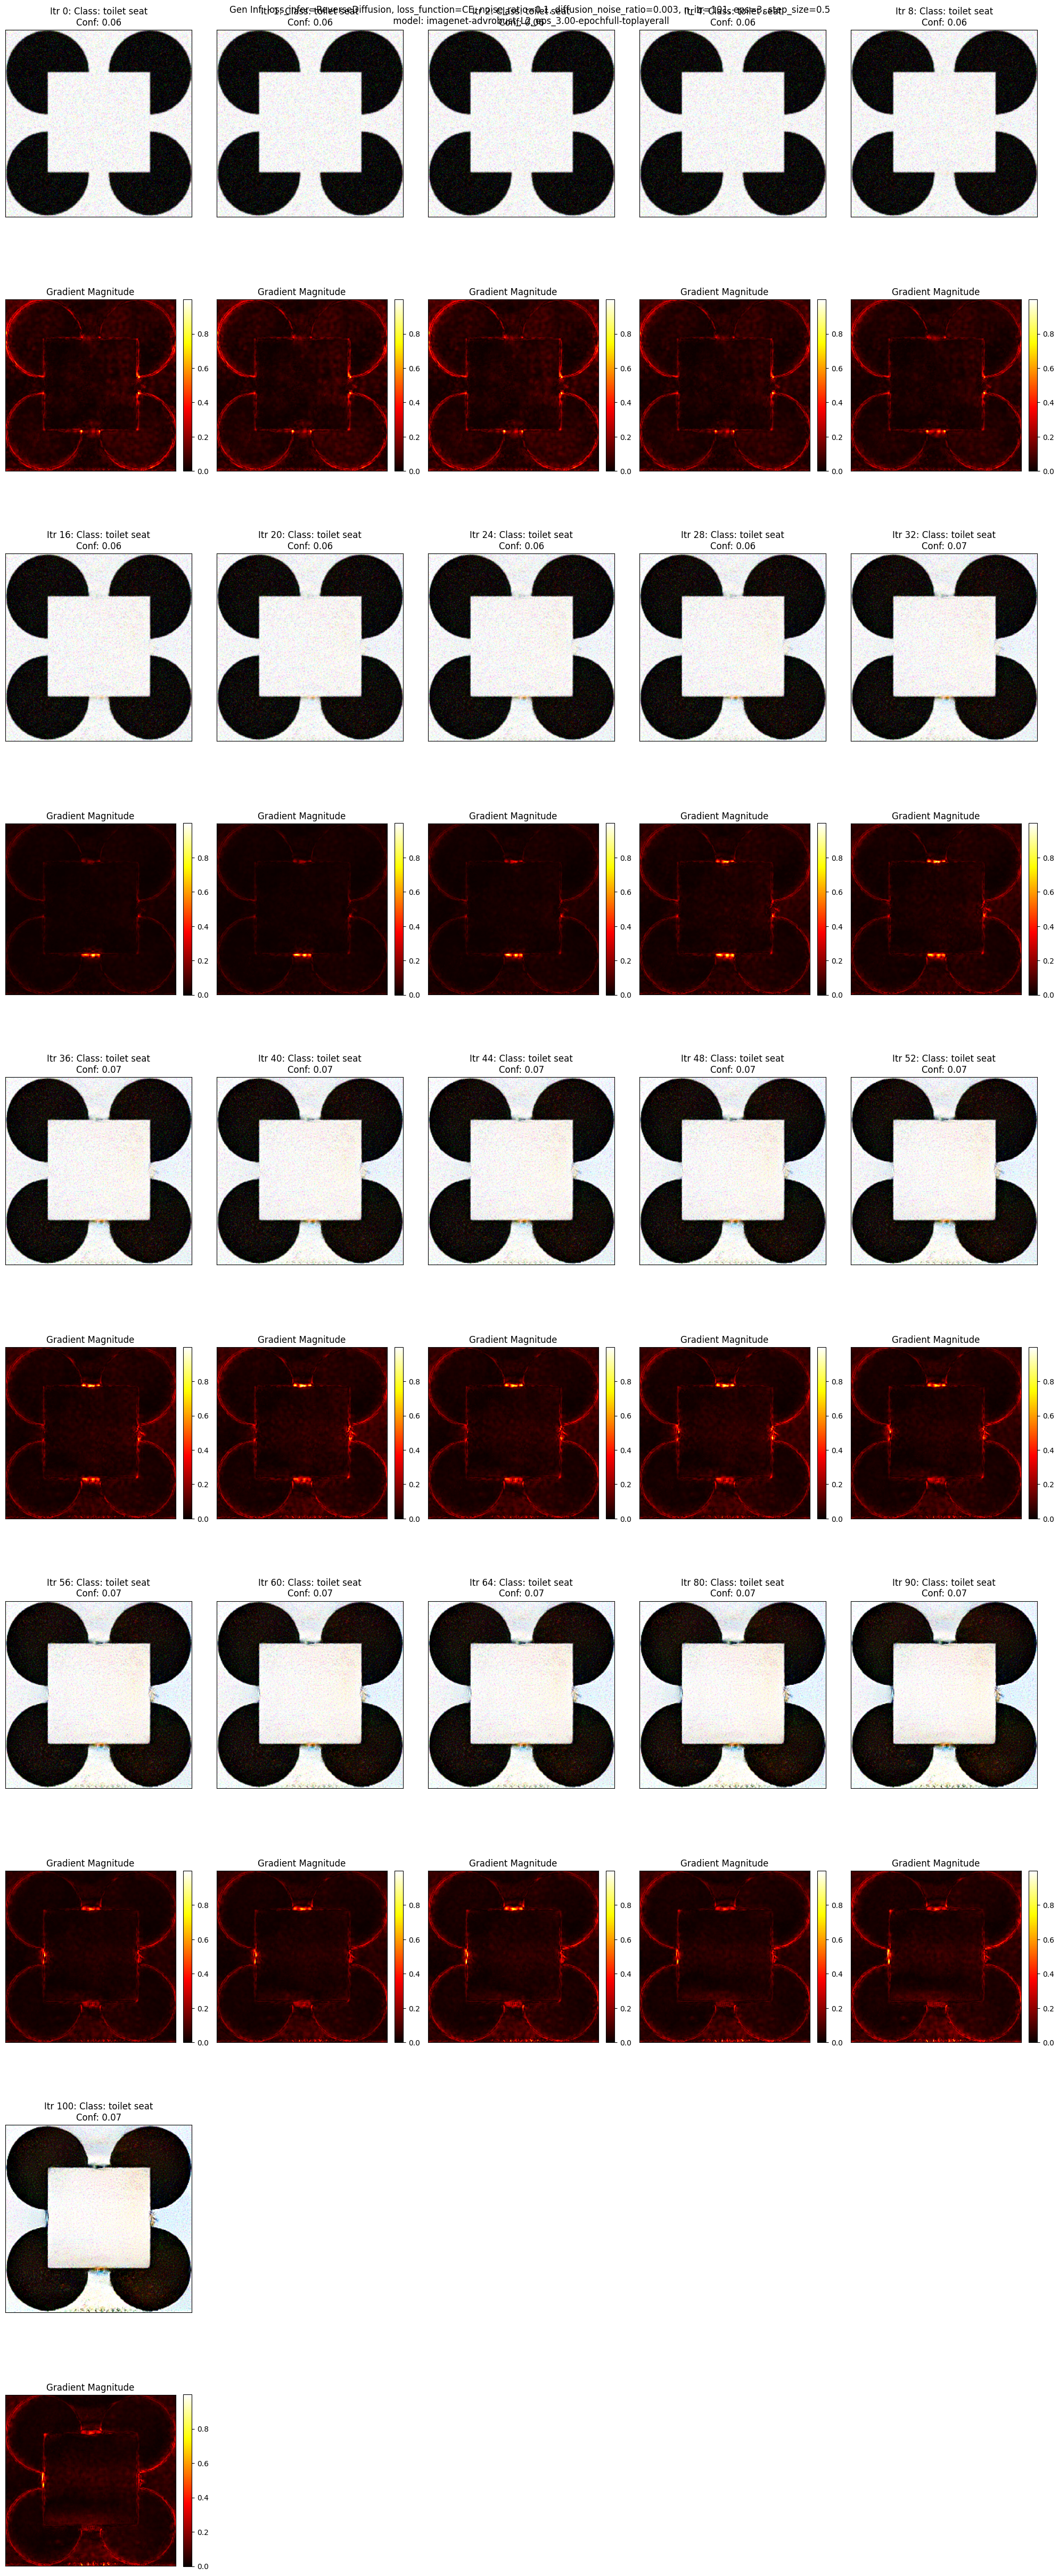

saved at: /home/tahereh/engram/users/Tahereh/Research/Results/Generative_Inference/imagenet-advrobust_L2_eps_3.00-full/KanizsaSq_all_geninf_imagenet_advrobust_L2_eps_3.00_epochfull_ReverseDiffusion_CE_noise_ratio0.1_diffusion_noise_ratio0.003_n_itr101_eps3_step_size0.5_confitr0_False_with_gradients.pdf


In [139]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

import time

# show the images and gradients in a grid - now with 2 rows per pattern
n_cols = 5
n_pattern_rows = len(selected_inferred_patterns)//n_cols + (1 if len(selected_inferred_patterns)%n_cols > 0 else 0)
if n_pattern_rows == 0:
    n_pattern_rows = 1
# Double the rows to accommodate gradients below each image
n_total_rows = n_pattern_rows * 2
fig, axes = plt.subplots(n_total_rows, n_cols, figsize=[20, 5*n_pattern_rows * 2])

if model_config['dataset_model'] == 'vggface2':
    norm_mean = torch.tensor([0.5,0.5,0.5]).view(-1, 1, 1).cuda()
    norm_std = torch.tensor([0.5,0.5,0.5]).view(-1, 1, 1).cuda()
elif model_config['dataset_model'] == 'imagenet' or model_config['dataset_model'] == 'imagenetvggface2':
    norm_mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1).cuda()
    norm_std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1).cuda()

contrast_list = []
predicted_emotion_list = []
confidence_emotion_list = []

for i in range(len(selected_inferred_patterns)):
    # Calculate positions for image and gradient
    row_idx = (i // n_cols) * 2  # Multiply by 2 to skip rows for gradients
    col_idx = i % n_cols
    
    # Get axes for both image and gradient
    if n_pattern_rows == 1:
        ax_img = axes[0] if n_cols == 1 else axes[col_idx]
        ax_grad = axes[1] if n_cols == 1 else axes[n_cols + col_idx]
    else:
        ax_img = axes[row_idx, col_idx]
        ax_grad = axes[row_idx + 1, col_idx]
        
    # Get the image and corresponding gradients
    image_to_compute = selected_inferred_patterns[i].squeeze(0).detach().cpu().numpy().transpose(1,2,0)
    gradients = selected_grad_patterns[i].squeeze(0).detach().cpu().numpy().transpose(1,2,0)
    
    # Normalize gradients for visualization
    grad_magnitude = np.sqrt(np.sum(gradients**2, axis=2))
    grad_normalized = (grad_magnitude - grad_magnitude.min()) / (grad_magnitude.max() - grad_magnitude.min() + 1e-8)
        
    
    predicted_emotion = 'N/A'
    confidence_emotion = 0
    first_itr_conf_got_high = 0
    emotion_detected = False
    color_title = 'black'
    
    # Plot image in top subplot
    ax_img.imshow(image_to_compute)
    # Plot gradient heatmap in bottom subplot
    gradient_plot = ax_grad.imshow(grad_normalized, cmap='hot')
    plt.colorbar(gradient_plot, ax=ax_grad, fraction=0.046, pad=0.04)
    
    # Set titles
    if model_config['dataset_model'] == 'imagenet':
        ax_img.set_title(f'Itr {iteration_numbers[i]}: Class: {labels_imagenet[perceived_categories[i]]}\nConf: {confidence_list[i]:.2f}', color=color_title)
    else:
        ax_img.set_title(f'Itr {iteration_numbers[i]}: Class: {perceived_categories[i]}\nConf: {confidence_list[i]:.2f}', color=color_title)
    
    ax_grad.set_title('Gradient Magnitude')
    
    # Remove ticks from both subplots
    ax_img.set_xticks([])
    ax_img.set_yticks([])
    ax_grad.set_xticks([])
    ax_grad.set_yticks([])

fig.suptitle(f'Gen Inf: loss_infer={inference_config["loss_infer"]}, loss_function={inference_config["loss_function"]}, noise_ratio={inference_config["initial_inference_noise_ratio"]}, diffusion_noise_ratio={inference_config["diffusion_noise_ratio"]}, n_itr={inference_config["n_itr"]}, eps={inference_config["eps"]}, step_size={inference_config["step_size"]}\n model: {args.dataset_model}-{args.model_training}-epoch{args.epoch_chkpnt}-toplayer{inference_config["top_layer"]}')

# Remove empty axes
for i in range(n_total_rows):
    for j in range(n_cols):
        pattern_idx = (i//2) * n_cols + j
        if pattern_idx >= len(selected_inferred_patterns):
            if n_pattern_rows > 1:
                fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

# Save figure
figsave_dir = os.path.join(resultsdir, f'{args.dataset_model}-{args.model_training}-{args.epoch_chkpnt}/')
if not os.path.exists(figsave_dir):
    os.makedirs(figsave_dir)

fig_name = f'{image_name}_{inference_config["top_layer"]}_geninf_{model_config["dataset_model"]}_{model_config["model_training"]}_epoch{model_config["epoch_chkpnt"]}_{inference_config["loss_infer"]}_{inference_config["loss_function"]}_noise_ratio{inference_config["initial_inference_noise_ratio"]}_diffusion_noise_ratio{inference_config["diffusion_noise_ratio"]}_n_itr{inference_config["n_itr"]}_eps{inference_config["eps"]}_step_size{inference_config["step_size"]}'
fig_name = fig_name + f'_confitr{first_itr_conf_got_high}_{emotion_detected}_with_gradients'

instance_counter = 0
while os.path.exists(os.path.join(figsave_dir, fig_name+'.pdf')):
    print('file already exists, adding instance number')
    if 'instance' in fig_name:
        fig_name = fig_name.split('_instance')[0]
    fig_name = fig_name + f'_instance{instance_counter}'
    instance_counter += 1

fig.savefig(os.path.join(figsave_dir, fig_name+'.pdf'), dpi=300, bbox_inches='tight')
print('saved at:', os.path.join(figsave_dir, fig_name+'.pdf'))

# Save results dictionary
dict_results = {
    'model_config': model_config,
    'inference_config': inference_config,
    'selected_inferred_patterns': selected_inferred_patterns,
    'selected_grad_patterns': selected_grad_patterns,
    'perceived_categories': perceived_categories,
    'iteration_numbers': iteration_numbers,
    'contrast_list': contrast_list,
    'predicted_emotion_list': predicted_emotion_list,
    'confidence_emotion_list': confidence_emotion_list
}
np.save(os.path.join(figsave_dir, fig_name+'.npy'), dict_results)

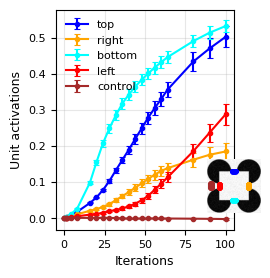

saved at: /home/tahereh/engram/users/Tahereh/Research/Results/Generative_Inference/imagenet-advrobust_L2_eps_3.00-full/Receptive_field_with_control_with_control_with_control_with_control_KanizsaSq_all_geninf_imagenet_advrobust_L2_eps_3.00_epochfull_ReverseDiffusion_CE_noise_ratio0.1_diffusion_noise_ratio0.003_n_itr101_eps3_step_size0.5_confitr0_False_with_gradients.pdf


In [149]:
# Create single figure for the plot
fig, ax_plot = plt.subplots(figsize=(3, 3))  # Squarish figure
# fig.suptitle('Emergence of Illusory Contours Over Iterations', fontsize=10)

# Define exact coordinates from original code
left_x = 51
right_x = 173
top_y = 51
bottom_y = 173
coord_edge_start = 104
coord_edge_end = 120

# Generate more sampling points for each rectangular region
n_points = 10  # Increase number of sampling points
def get_rect_points(x_start, x_end, y_start, y_end, n_points=n_points):
    """Generate a grid of points covering a rectangular region"""
    x_points = np.linspace(x_start, x_end, n_points)
    y_points = np.linspace(y_start, y_end, n_points)
    points = []
    for x in x_points:
        for y in y_points:
            points.append((int(y), int(x)))
    return points

# Define sampling regions as rectangles
edge_points = {
    'top': get_rect_points(coord_edge_start, coord_edge_end, top_y-2, top_y+2),
    'right': get_rect_points(right_x-2, right_x+2, coord_edge_start, coord_edge_end),
    'bottom': get_rect_points(coord_edge_start, coord_edge_end, bottom_y-2, bottom_y+2),
    'left': get_rect_points(left_x-2, left_x+2, coord_edge_start, coord_edge_end)
}

# Add control region far to the left but ensure it's within valid bounds
control_x_start = max(0, left_x - 40)  # Ensure x-coordinates are non-negative
control_x_end = max(0, left_x - 30)
control_y_start = coord_edge_start
control_y_end = coord_edge_end
edge_points['control'] = get_rect_points(control_x_start, control_x_end, control_y_start - 2, control_y_end + 2)

# Colors for each edge
colors = {'left': 'red', 'right': 'orange', 'top': 'blue', 'bottom': 'cyan', 'control': 'brown'}

# Ensure iteration numbers match the number of patterns
n_iterations = len(selected_inferred_patterns)
iterations = np.array(iteration_numbers[:n_iterations])

# Plot all edge responses on the same axis
for edge_name, points in edge_points.items():
    # Validate points to ensure they are within bounds of the image
    img_height, img_width = selected_inferred_patterns[0][0, 0].shape
    valid_points = [(y, x) for y, x in points if 0 <= x < img_width and 0 <= y < img_height]

    # Store all responses for each iteration
    all_responses = []
    for pattern in selected_inferred_patterns:
        pixel_responses = []
        for y, x in valid_points:
            # Invert the values so black (0) becomes 1 and white (1) becomes 0
            response = 1 - pattern[0, :, y, x].mean().item()
            pixel_responses.append(response)
        all_responses.append(pixel_responses)
    
    # Convert to numpy array for easier calculation
    all_responses = np.array(all_responses)  # shape: (n_iterations, n_pixels)
    
    # Subtract iteration zero
    all_responses = all_responses - all_responses[0, :]
    
    # Calculate mean and SEM
    mean_responses = np.mean(all_responses, axis=1)
    sem_responses = np.std(all_responses, axis=1) / np.sqrt(all_responses.shape[1])
    
    # Plot mean response with error bars
    ax_plot.errorbar(iterations, mean_responses, yerr=sem_responses,
                     color=colors[edge_name], label=f'{edge_name}',
                     capsize=2, capthick=0.8, linewidth=1.5, marker='o', markersize=3)

# Configure the response plot
ax_plot.set_xlabel('Iterations', fontsize=9)
ax_plot.set_ylabel('Unit activations', fontsize=9)
ax_plot.tick_params(axis='both', which='major', labelsize=8)
ax_plot.grid(True, alpha=0.3)
ax_plot.legend(fontsize=8, loc='upper left', frameon=False)

# Add Kanizsa image as inset
ax_inset = ax_plot.inset_axes([0.85, 0.05, 0.3, 0.3])
last_pattern = selected_inferred_patterns[0][0, 0].detach().cpu()
ax_inset.imshow(last_pattern, cmap='gray')

# Plot sampling points for each edge and the control region
for edge_name, points in edge_points.items():
    valid_points = [(y, x) for y, x in points if 0 <= x < img_width and 0 <= y < img_height]
    x_points = [x for y, x in valid_points]
    y_points = [y for y, x in valid_points]
    ax_inset.plot(x_points, y_points, 'o', color=colors[edge_name], 
                  fillstyle='none', markersize=2)

ax_inset.axis('off')

plt.tight_layout(pad=1.5)
plt.show()

# Save the figure
if not fig_name.startswith('Receptive_field_'):
    fig_name = 'Receptive_field_' + fig_name
fig.savefig(os.path.join(figsave_dir, fig_name + '.pdf'), dpi=300, bbox_inches='tight')
print('saved at:', os.path.join(figsave_dir, fig_name + '.pdf'))